<a href="https://colab.research.google.com/github/JJ-HMFIC/ML_Basic/blob/main/ML_Basic_Ch07_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

07-2

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random
# v1은 코랩에서 구현하기 힘들어 v2로 변환하여 진행
tf.random.set_seed(777)  # for reproducibility

In [ ]:
# Load MNIST data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
# 255.0으로 나누어 정규화

In [ ]:
# Flatten the images
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))
# 1D 배열로 평면화

In [ ]:
nb_classes = 10

In [ ]:
# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(nb_classes, activation='softmax', input_shape=(784,))
])
# Sequential() : 입력층부터 출력층까지 차례대로 쌓아가는 것으로 모델을 구성
# Dense() : 단일 Dense 레이어가 있는 간단한 순차 모델

In [ ]:
# 모델 컴파일
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
# 정확도는 훈련 중에 모니터링할 측정항목

In [ ]:
# Convert labels to one-hot encoding
y_train_one_hot = tf.keras.utils.to_categorical(y_train, nb_classes)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, nb_classes)

In [ ]:
# Train the model
num_epochs = 15 # 전체 데이터 셋을 한 번 다 학습 = 에폭
batch_size = 100 # 한 번에 몇 개 돌릴꺼냐

history = model.fit(x_train, y_train_one_hot, epochs=num_epochs, batch_size=batch_size)

Train on 60000 samples
Epoch 1/15
60000/60000 [==============================] - 2s 31us/sample - loss: 1.1509 - acc: 0.7345
Epoch 2/15
60000/60000 [==============================] - 1s 17us/sample - loss: 0.6482 - acc: 0.8495
Epoch 3/15
60000/60000 [==============================] - 1s 17us/sample - loss: 0.5400 - acc: 0.8663
Epoch 4/15
60000/60000 [==============================] - 1s 17us/sample - loss: 0.4877 - acc: 0.8756
Epoch 5/15
60000/60000 [==============================] - 1s 16us/sample - loss: 0.4556 - acc: 0.8811
Epoch 6/15
60000/60000 [==============================] - 1s 16us/sample - loss: 0.4334 - acc: 0.8855
Epoch 7/15
60000/60000 [==============================] - 1s 17us/sample - loss: 0.4169 - acc: 0.8888
Epoch 8/15
60000/60000 [==============================] - 1s 17us/sample - loss: 0.4040 - acc: 0.8917
Epoch 9/15
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3936 - acc: 0.8938
Epoch 10/15
60000/60000 [==============================] - 

In [ ]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test_one_hot, verbose=2)
print(f"Test Accuracy: {test_accuracy}")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Test Accuracy: 0.9085000157356262


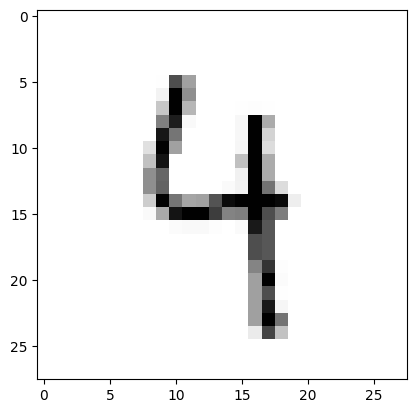

In [ ]:
plt.imshow(x_test[r].reshape(28, 28), cmap="Greys", interpolation="nearest")
plt.show()

In [ ]:
with tf.Session() as sess:
   # Initialize TensorFlow variables
   sess.run(tf.global_variables_initializer())
   # Training cycle
   for epoch in range(training_epochs):
       avg_cost = 0
       total_batch = int(mnist.train.num_examples / batch_size) # 몇 번 루프돌면 1 에폭이 되는가

       for i in range(total_batch):
           batch_xs, batch_ys = mnist.train.next_batch(batch_size) # 100개씩 읽어서
           c, _ = sess.run([cost, optimizer], feed_dict={X: batch_xs, Y: batch_ys}) #학습
           avg_cost += c / total_batch # 루프가 끝나면 1에폭이 끝남

       print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))


In [ ]:
# Test the model using test sets
print("Accuracy: ", accuracy.eval(session=sess,
      feed_dict={X: mnist.test.images, Y: mnist.test.labels}))
